# Exploring for potential location for Indian Restaurant in Vancouver.

In [101]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline
print('Packages installed')

Packages installed


In [102]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [103]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_a702158cd00348f4aa12fd77c2d67047 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_a702158cd00348f4aa12fd77c2d67047 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_a702158cd00348f4aa12fd77c2d67047 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='U_XWX3B7Er18jdAAkC_jo5dQV7fkQiX5SzF9zFz2ZqwO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_a702158cd00348f4aa12fd77c2d67047)

body = client_a702158cd00348f4aa12fd77c2d67047.get_object(Bucket='courseracapstone-donotdelete-pr-g9eabwfmedis5t',Key='vancouver.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


import io
df_data_0 = pd.read_excel(io.BytesIO(body.read()))
df_data_0.head()

df = df_data_0

df



,Neighbourhood,Latitude,Longitude
0,Kensington-Cedar Cottage,49.246686,-123.072885
1,Mount Pleasant,49.263065,-123.098513
2,Oakridge,49.226403,-123.123025
3,Renfrew-Collingwood,49.247343,-123.040166
4,Sunset,49.218756,-123.092038
5,West Point Grey,49.268401,-123.203468
6,Dunbar-Southlands,49.237962,-123.189547
7,Kerrisdale,49.223655,-123.159576
8,Killarney,49.217022,-123.037647
9,Kitsilano,49.267540,-123.163295


In [104]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [105]:
import folium

In [106]:

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [107]:
address = 'Vancouver'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


In [108]:
# create map of Vanocuver using latitude and longitude values
map_Vancouver = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver

In [109]:
CLIENT_ID = 'VWMZ2NUJ4XEWH02WPIWAVF5BLR5VTKF54E0UM5QDMEAUWOD0' # your Foursquare ID
CLIENT_SECRET = 'UZTEHG2SQPZPVLRIHYPJNLXAEGCGDUDMD02NG2GXP4CFIG0H' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('VWMZ2NUJ4XEWH02WPIWAVF5BLR5VTKF54E0UM5QDMEAUWOD0: ' + CLIENT_ID)
print('UZTEHG2SQPZPVLRIHYPJNLXAEGCGDUDMD02NG2GXP4CFIG0H:' + CLIENT_SECRET)

Your credentails:
VWMZ2NUJ4XEWH02WPIWAVF5BLR5VTKF54E0UM5QDMEAUWOD0: VWMZ2NUJ4XEWH02WPIWAVF5BLR5VTKF54E0UM5QDMEAUWOD0
UZTEHG2SQPZPVLRIHYPJNLXAEGCGDUDMD02NG2GXP4CFIG0H:UZTEHG2SQPZPVLRIHYPJNLXAEGCGDUDMD02NG2GXP4CFIG0H


In [110]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [111]:
import requests


In [112]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Foursquare API to explore the locations

In [113]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'VWMZ2NUJ4XEWH02WPIWAVF5BLR5VTKF54E0UM5QDMEAUWOD0'# Foursquare ID, note there is a daily call quota limit 
    CLIENT_SECRET ='UZTEHG2SQPZPVLRIHYPJNLXAEGCGDUDMD02NG2GXP4CFIG0H' # Foursquare Secret, note there is a daily call quota it
    VERSION = '20180605' # Foursquare API version
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
    # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT)
    
    # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
    # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [114]:
df1= getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Kensington-Cedar Cottage
Mount Pleasant
Oakridge
Renfrew-Collingwood
Sunset
West Point Grey
Dunbar-Southlands
Kerrisdale
Killarney
Kitsilano
South Cambie
Victoria-Fraserview
Arbutus-Ridge
Downtown
Fairview
Grandview-Woodland
Hastings-Sunrise
Marpole
Riley Park
Shaughnessy
Strathcona
West End


In [115]:
print(df1.shape)
df1.head()

(1276, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kensington-Cedar Cottage,49.246686,-123.072885,Famous Foods,49.248356,-123.071471,Grocery Store
1,Kensington-Cedar Cottage,49.246686,-123.072885,Anytime Fitness,49.249640,-123.075450,Gym / Fitness Center
2,Kensington-Cedar Cottage,49.246686,-123.072885,House of Dosas,49.250393,-123.076346,Indian Restaurant
3,Kensington-Cedar Cottage,49.246686,-123.072885,Sun Bo Kong,49.250698,-123.077046,Vegetarian / Vegan Restaurant
4,Kensington-Cedar Cottage,49.246686,-123.072885,My Chau,49.247153,-123.069423,Vietnamese Restaurant


In [116]:
#finding the list of categories
df1['Venue Category'].unique()[:100]

array(['Grocery Store', 'Gym / Fitness Center', 'Indian Restaurant',
       'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant', 'Café',
       'Seafood Restaurant', 'Burger Joint', 'Chinese Restaurant',
       'American Restaurant', 'Park', 'Thai Restaurant',
       'South Indian Restaurant', 'Massage Studio', 'Bank',
       'Breakfast Spot', 'Cantonese Restaurant', 'Pizza Place',
       'Smoke Shop', 'Sandwich Place', 'Supermarket', 'Inn',
       'Discount Store', 'Social Club', 'Gas Station',
       'German Restaurant', 'Convenience Store', 'Bus Stop',
       'Fast Food Restaurant', 'Cosmetics Shop', 'Liquor Store',
       'Insurance Office', 'Deli / Bodega', 'Church', 'Restaurant',
       'Market', 'Bookstore', 'Outdoor Sculpture', 'Tea Room',
       'Sushi Restaurant', 'Diner', 'Coffee Shop', 'Brewery', 'Lounge',
       'Bagel Shop', 'Taco Place', 'Burrito Place',
       'Latin American Restaurant', 'Yoga Studio', 'Donut Shop',
       'Arts & Crafts Store', 'Thrift / Vintage 

## Confirming for Indian restaurants

In [117]:
# Exploring the results containing the word "Indian Restaurant"
"Indian Restaurant" in df1['Venue Category'].unique()

True

## Analyzing each Neighbourhood

In [118]:
## Analzing Each Neighbourhood
# one hot encoding
vancouver_onehot = pd.get_dummies(df1[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood column to dataframe
vancouver_onehot['Neighbourhood'] = df1['Neighbourhood'] 

# moving neighborhood column to the first column
cols=list(vancouver_onehot.columns.values)
cols.pop(cols.index('Neighbourhood'))
vancouver_onehot=vancouver_onehot[['Neighbourhood']+cols]


vancouver_onehot.head()

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Shop,Women's Store,Yoga Studio
0,Kensington-Cedar Cottage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kensington-Cedar Cottage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kensington-Cedar Cottage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kensington-Cedar Cottage,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Kensington-Cedar Cottage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
vancouver_grouped = vancouver_onehot.groupby(["Neighbourhood"]).mean().reset_index()

print(vancouver_grouped.shape)
vancouver_grouped

(22, 213)


,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,...,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Water Park,Waterfront,Wine Shop,Women's Store,Yoga Studio
0,Arbutus-Ridge,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
1,Downtown,0.000000,0.00,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.00,...,0.01,0.00,0.020000,0.000000,0.010000,0.00,0.00,0.000000,0.000000,0.03
2,Dunbar-Southlands,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
3,Fairview,0.000000,0.00,0.010000,0.000000,0.00,0.030000,0.020000,0.000000,0.00,...,0.00,0.01,0.010000,0.000000,0.010000,0.01,0.01,0.000000,0.010000,0.01
4,Grandview-Woodland,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.020000,0.010000,0.00,...,0.00,0.00,0.020000,0.000000,0.010000,0.00,0.00,0.010000,0.000000,0.00
5,Hastings-Sunrise,0.000000,0.00,0.018868,0.018868,0.00,0.018868,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.000000,0.056604,0.00,0.00,0.000000,0.000000,0.00
6,Kensington-Cedar Cottage,0.000000,0.00,0.035714,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.053571,0.000000,0.160714,0.00,0.00,0.000000,0.000000,0.00
7,Kerrisdale,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00
8,Killarney,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.00,0.00,0.000000,0.040000,0.000000,0.00,0.00,0.000000,0.000000,0.00
9,Kitsilano,0.000000,0.00,0.020000,0.000000,0.00,0.000000,0.010000,0.000000,0.00,...,0.00,0.00,0.030000,0.000000,0.010000,0.00,0.00,0.010000,0.000000,0.02


In [120]:

len(vancouver_grouped[vancouver_grouped["Indian Restaurant"] > 0])

10

In [121]:
v_grouped = vancouver_grouped[["Neighbourhood","Indian Restaurant"]]
v_grouped.head()

,Neighbourhood,Indian Restaurant
0,Arbutus-Ridge,0.00
1,Downtown,0.01
2,Dunbar-Southlands,0.00
3,Fairview,0.01
4,Grandview-Woodland,0.03


In [122]:
num_top_venues = 5

for hood in vancouver_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = vancouver_grouped[vancouver_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus-Ridge----
           venue  freq
0         Bakery  0.09
1  Shopping Mall  0.09
2           Park  0.09
3            Gym  0.05
4    Coffee Shop  0.05


----Downtown----
                venue  freq
0               Hotel  0.08
1         Coffee Shop  0.05
2          Restaurant  0.05
3        Dessert Shop  0.04
4  Seafood Restaurant  0.04


----Dunbar-Southlands----
                 venue  freq
0        Grocery Store  0.17
1          Coffee Shop  0.11
2                  Gym  0.11
3  Japanese Restaurant  0.06
4         Liquor Store  0.06


----Fairview----
                venue  freq
0          Restaurant  0.06
1         Coffee Shop  0.05
2              Bakery  0.05
3  Seafood Restaurant  0.05
4                Park  0.05


----Grandview-Woodland----
              venue  freq
0       Coffee Shop  0.11
1           Brewery  0.08
2              Café  0.07
3  Sushi Restaurant  0.04
4       Pizza Place  0.04


----Hastings-Sunrise----
                          venue  freq
0  Theme Park 

In [123]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [124]:

# Generate the top 10 most common venue categories in each neighborhood 
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = vancouver_grouped['Neighbourhood']

for ind in np.arange(vancouver_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vancouver_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus-Ridge,Bakery,Shopping Mall,Park,Coffee Shop,Lounge,Liquor Store,Seafood Restaurant,Sandwich Place,Burger Joint,Grocery Store
1,Downtown,Hotel,Restaurant,Coffee Shop,Seafood Restaurant,Sandwich Place,Dessert Shop,Italian Restaurant,Clothing Store,Concert Hall,Taco Place
2,Dunbar-Southlands,Grocery Store,Coffee Shop,Gym,Pub,Pet Store,Liquor Store,Café,Sandwich Place,Gym / Fitness Center,Golf Course
3,Fairview,Restaurant,Bakery,Coffee Shop,Park,Seafood Restaurant,Japanese Restaurant,Furniture / Home Store,Theater,Arts & Crafts Store,Café
4,Grandview-Woodland,Coffee Shop,Brewery,Café,Pizza Place,Italian Restaurant,Sushi Restaurant,Bakery,Grocery Store,French Restaurant,Deli / Bodega
5,Hastings-Sunrise,Theme Park Ride / Attraction,Park,Coffee Shop,Vietnamese Restaurant,Beer Garden,Pharmacy,Theater,Event Space,Theme Park,Fast Food Restaurant
6,Kensington-Cedar Cottage,Vietnamese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Café,American Restaurant,Grocery Store,Bank,Fast Food Restaurant,Liquor Store,Bus Stop
7,Kerrisdale,Bus Stop,Grocery Store,Café,Chinese Restaurant,Golf Course,Pool,Spanish Restaurant,Park,Bakery,Pizza Place
8,Killarney,Pizza Place,Bus Stop,Chinese Restaurant,Bar,Fast Food Restaurant,Farmers Market,Shopping Mall,Pharmacy,Liquor Store,Supermarket
9,Kitsilano,Coffee Shop,Sushi Restaurant,Bakery,Clothing Store,Vegetarian / Vegan Restaurant,Café,Park,Beach,Greek Restaurant,Malay Restaurant


In [125]:
from sklearn.cluster import KMeans

## Now we will cluster the neighbourhoods

In [126]:
# set number of clusters
kclusters = 5

vancouver_grouped_clustering = vancouver_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[1:10]

array([0, 2, 0, 0, 0, 0, 3, 3, 0], dtype=int32)

In [128]:
vancouver_merged = df

# add clustering labels
vancouver_merged['Cluster Labels'] = kmeans.labels_

# merge vancouver_grouped with df to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vancouver_merged.head(21) 

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kensington-Cedar Cottage,49.246686,-123.072885,0,Vietnamese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Café,American Restaurant,Grocery Store,Bank,Fast Food Restaurant,Liquor Store,Bus Stop
1,Mount Pleasant,49.263065,-123.098513,0,Coffee Shop,Brewery,Bakery,Vietnamese Restaurant,Café,Park,Sushi Restaurant,Yoga Studio,Pizza Place,Outdoor Supply Store
2,Oakridge,49.226403,-123.123025,2,Sushi Restaurant,Men's Store,Fast Food Restaurant,Bike Rental / Bike Share,Bus Stop,Tea Room,Jewelry Store,Shopping Mall,Sporting Goods Shop,Park
3,Renfrew-Collingwood,49.247343,-123.040166,0,Park,Bus Stop,Pizza Place,Dog Run,Bar,Deli / Bodega,Flower Shop,Plaza,Bookstore,Convenience Store
4,Sunset,49.218756,-123.092038,0,Indian Restaurant,Market,Bus Stop,Chinese Restaurant,Bakery,Pharmacy,Park,Bank,Restaurant,Thai Restaurant
5,West Point Grey,49.268401,-123.203468,0,Bank,Sushi Restaurant,Harbor / Marina,Beach,Park,Bakery,Coffee Shop,Garden,Restaurant,Bus Stop
6,Dunbar-Southlands,49.237962,-123.189547,0,Grocery Store,Coffee Shop,Gym,Pub,Pet Store,Liquor Store,Café,Sandwich Place,Gym / Fitness Center,Golf Course
7,Kerrisdale,49.223655,-123.159576,3,Bus Stop,Grocery Store,Café,Chinese Restaurant,Golf Course,Pool,Spanish Restaurant,Park,Bakery,Pizza Place
8,Killarney,49.217022,-123.037647,3,Pizza Place,Bus Stop,Chinese Restaurant,Bar,Fast Food Restaurant,Farmers Market,Shopping Mall,Pharmacy,Liquor Store,Supermarket
9,Kitsilano,49.267540,-123.163295,0,Coffee Shop,Sushi Restaurant,Bakery,Clothing Store,Vegetarian / Vegan Restaurant,Café,Park,Beach,Greek Restaurant,Malay Restaurant


## Visualization of Vancouver neighbourhoods clusters

In [129]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster 0-Most common venues: Coffee shop,restaurants, bakery

In [139]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[0] + list(range(3, vancouver_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kensington-Cedar Cottage,0,Vietnamese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Café,American Restaurant,Grocery Store,Bank,Fast Food Restaurant,Liquor Store,Bus Stop
1,Mount Pleasant,0,Coffee Shop,Brewery,Bakery,Vietnamese Restaurant,Café,Park,Sushi Restaurant,Yoga Studio,Pizza Place,Outdoor Supply Store
3,Renfrew-Collingwood,0,Park,Bus Stop,Pizza Place,Dog Run,Bar,Deli / Bodega,Flower Shop,Plaza,Bookstore,Convenience Store
4,Sunset,0,Indian Restaurant,Market,Bus Stop,Chinese Restaurant,Bakery,Pharmacy,Park,Bank,Restaurant,Thai Restaurant
5,West Point Grey,0,Bank,Sushi Restaurant,Harbor / Marina,Beach,Park,Bakery,Coffee Shop,Garden,Restaurant,Bus Stop
6,Dunbar-Southlands,0,Grocery Store,Coffee Shop,Gym,Pub,Pet Store,Liquor Store,Café,Sandwich Place,Gym / Fitness Center,Golf Course
9,Kitsilano,0,Coffee Shop,Sushi Restaurant,Bakery,Clothing Store,Vegetarian / Vegan Restaurant,Café,Park,Beach,Greek Restaurant,Malay Restaurant
11,Victoria-Fraserview,0,Pizza Place,Vietnamese Restaurant,Asian Restaurant,Convenience Store,Gas Station,Sandwich Place,Pet Store,Restaurant,Fish Market,Bus Stop
12,Arbutus-Ridge,0,Bakery,Shopping Mall,Park,Coffee Shop,Lounge,Liquor Store,Seafood Restaurant,Sandwich Place,Burger Joint,Grocery Store
14,Fairview,0,Restaurant,Bakery,Coffee Shop,Park,Seafood Restaurant,Japanese Restaurant,Furniture / Home Store,Theater,Arts & Crafts Store,Café


## Cluster 1-Most common venues: Coffee shop, brewery

In [140]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[0] + list(range(3, vancouver_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Grandview-Woodland,1,Coffee Shop,Brewery,Café,Pizza Place,Italian Restaurant,Sushi Restaurant,Bakery,Grocery Store,French Restaurant,Deli / Bodega
16,Hastings-Sunrise,1,Theme Park Ride / Attraction,Park,Coffee Shop,Vietnamese Restaurant,Beer Garden,Pharmacy,Theater,Event Space,Theme Park,Fast Food Restaurant


## Cluster 2-Most common venues: Restaurant, clothing store

In [141]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[0] + list(range(3, vancouver_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Oakridge,2,Sushi Restaurant,Men's Store,Fast Food Restaurant,Bike Rental / Bike Share,Bus Stop,Tea Room,Jewelry Store,Shopping Mall,Sporting Goods Shop,Park


## Cluster 3-Most common venues: Coffee shop, grocery store

In [142]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[0] + list(range(3, vancouver_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kerrisdale,3,Bus Stop,Grocery Store,Café,Chinese Restaurant,Golf Course,Pool,Spanish Restaurant,Park,Bakery,Pizza Place
8,Killarney,3,Pizza Place,Bus Stop,Chinese Restaurant,Bar,Fast Food Restaurant,Farmers Market,Shopping Mall,Pharmacy,Liquor Store,Supermarket
10,South Cambie,3,Park,Coffee Shop,Garden,Dessert Shop,Bank,Chinese Restaurant,Sushi Restaurant,Sandwich Place,Outdoor Sculpture,Vietnamese Restaurant
18,Riley Park,3,Coffee Shop,Grocery Store,Café,Park,Bakery,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Farmers Market,Garden


## Cluster 4-Most common venues: Hotel, Restaurant

In [143]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[0] + list(range(3, vancouver_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown,4,Hotel,Restaurant,Coffee Shop,Seafood Restaurant,Sandwich Place,Dessert Shop,Italian Restaurant,Clothing Store,Concert Hall,Taco Place


In [144]:
vancouver_Indian_res = v_grouped

# add clustering labels
vancouver_Indian_res['Cluster Labels'] = kmeans.labels_

# merge Barcelona_grouped with df to add latitude/longitude for each neighborhood
vancouver_Indian_res = vancouver_Indian_res.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vancouver_Indian_res.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Neighbourhood,Indian Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus-Ridge,0.00,0,Bakery,Shopping Mall,Park,Coffee Shop,Lounge,Liquor Store,Seafood Restaurant,Sandwich Place,Burger Joint,Grocery Store
1,Downtown,0.01,0,Hotel,Restaurant,Coffee Shop,Seafood Restaurant,Sandwich Place,Dessert Shop,Italian Restaurant,Clothing Store,Concert Hall,Taco Place
2,Dunbar-Southlands,0.00,2,Grocery Store,Coffee Shop,Gym,Pub,Pet Store,Liquor Store,Café,Sandwich Place,Gym / Fitness Center,Golf Course
3,Fairview,0.01,0,Restaurant,Bakery,Coffee Shop,Park,Seafood Restaurant,Japanese Restaurant,Furniture / Home Store,Theater,Arts & Crafts Store,Café
4,Grandview-Woodland,0.03,0,Coffee Shop,Brewery,Café,Pizza Place,Italian Restaurant,Sushi Restaurant,Bakery,Grocery Store,French Restaurant,Deli / Bodega


In [145]:
#Cluster 0
vancouver_Indian_res.loc[vancouver_Indian_res['Cluster Labels']==0]

,Neighbourhood,Indian Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus-Ridge,0.000000,0,Bakery,Shopping Mall,Park,Coffee Shop,Lounge,Liquor Store,Seafood Restaurant,Sandwich Place,Burger Joint,Grocery Store
1,Downtown,0.010000,0,Hotel,Restaurant,Coffee Shop,Seafood Restaurant,Sandwich Place,Dessert Shop,Italian Restaurant,Clothing Store,Concert Hall,Taco Place
3,Fairview,0.010000,0,Restaurant,Bakery,Coffee Shop,Park,Seafood Restaurant,Japanese Restaurant,Furniture / Home Store,Theater,Arts & Crafts Store,Café
4,Grandview-Woodland,0.030000,0,Coffee Shop,Brewery,Café,Pizza Place,Italian Restaurant,Sushi Restaurant,Bakery,Grocery Store,French Restaurant,Deli / Bodega
5,Hastings-Sunrise,0.018868,0,Theme Park Ride / Attraction,Park,Coffee Shop,Vietnamese Restaurant,Beer Garden,Pharmacy,Theater,Event Space,Theme Park,Fast Food Restaurant
6,Kensington-Cedar Cottage,0.017857,0,Vietnamese Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Café,American Restaurant,Grocery Store,Bank,Fast Food Restaurant,Liquor Store,Bus Stop
9,Kitsilano,0.020000,0,Coffee Shop,Sushi Restaurant,Bakery,Clothing Store,Vegetarian / Vegan Restaurant,Café,Park,Beach,Greek Restaurant,Malay Restaurant
11,Mount Pleasant,0.020000,0,Coffee Shop,Brewery,Bakery,Vietnamese Restaurant,Café,Park,Sushi Restaurant,Yoga Studio,Pizza Place,Outdoor Supply Store
12,Oakridge,0.000000,0,Sushi Restaurant,Men's Store,Fast Food Restaurant,Bike Rental / Bike Share,Bus Stop,Tea Room,Jewelry Store,Shopping Mall,Sporting Goods Shop,Park
14,Riley Park,0.000000,0,Coffee Shop,Grocery Store,Café,Park,Bakery,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Farmers Market,Garden


In [146]:
#Cluster 1
vancouver_Indian_res.loc[vancouver_Indian_res['Cluster Labels']==1]

,Neighbourhood,Indian Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Shaughnessy,0.0,1,Garden,Park,Bus Stop,Bubble Tea Shop,Coffee Shop,Event Space,Lounge,Farm,Food Truck,Food Court
16,South Cambie,0.0,1,Park,Coffee Shop,Garden,Dessert Shop,Bank,Chinese Restaurant,Sushi Restaurant,Sandwich Place,Outdoor Sculpture,Vietnamese Restaurant


In [147]:
#Cluster 2
vancouver_Indian_res.loc[vancouver_Indian_res['Cluster Labels']==2]

,Neighbourhood,Indian Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Dunbar-Southlands,0.0,2,Grocery Store,Coffee Shop,Gym,Pub,Pet Store,Liquor Store,Café,Sandwich Place,Gym / Fitness Center,Golf Course


In [148]:
#Cluster 3
vancouver_Indian_res.loc[vancouver_Indian_res['Cluster Labels']==3]

,Neighbourhood,Indian Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kerrisdale,0.000000,3,Bus Stop,Grocery Store,Café,Chinese Restaurant,Golf Course,Pool,Spanish Restaurant,Park,Bakery,Pizza Place
8,Killarney,0.000000,3,Pizza Place,Bus Stop,Chinese Restaurant,Bar,Fast Food Restaurant,Farmers Market,Shopping Mall,Pharmacy,Liquor Store,Supermarket
10,Marpole,0.015873,3,Chinese Restaurant,Bank,Japanese Restaurant,Coffee Shop,Bus Stop,Sushi Restaurant,Sandwich Place,Café,Gas Station,Thai Restaurant
18,Sunset,0.162791,3,Indian Restaurant,Market,Bus Stop,Chinese Restaurant,Bakery,Pharmacy,Park,Bank,Restaurant,Thai Restaurant


In [149]:
#Cluster 4
vancouver_Indian_res.loc[vancouver_Indian_res['Cluster Labels']==4]

,Neighbourhood,Indian Restaurant,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Renfrew-Collingwood,0.0,4,Park,Bus Stop,Pizza Place,Dog Run,Bar,Deli / Bodega,Flower Shop,Plaza,Bookstore,Convenience Store


## Lets visualize the  number of Indian restaurant per neighbourhood


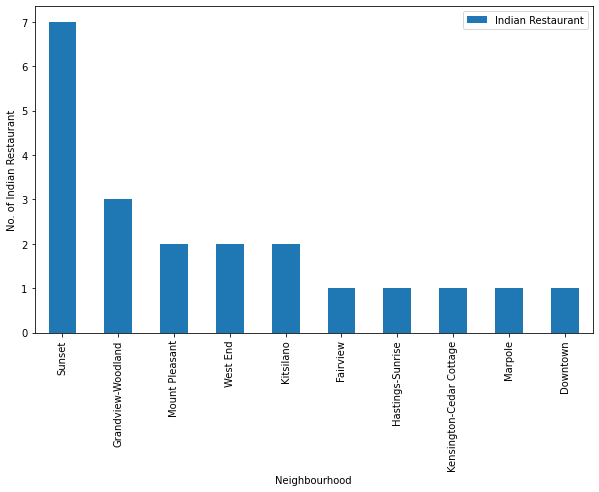

In [150]:
graph = pd.DataFrame(vancouver_onehot.groupby('Neighbourhood')['Indian Restaurant'].sum())
graph = graph.sort_values(by ='Indian Restaurant', ascending= False)
graph.iloc[:10].plot(kind='bar', figsize=(10,6))
plt.xlabel('Neighbourhood')
plt.ylabel('No. of Indian Restaurant')
plt.show()
                     

In [152]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
vancouver_new = v_grouped.copy()

# add clustering labels
v_grouped["Cluster Labels"] = kmeans.labels_

vancouver_new.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Neighbourhood,Indian Restaurant,Cluster Labels
0,Arbutus-Ridge,0.00,0
1,Downtown,0.01,0
2,Dunbar-Southlands,0.00,2
3,Fairview,0.01,0
4,Grandview-Woodland,0.03,0


## Analysis of each cluster

In [159]:

cluster0 = vancouver_new.loc[vancouver_new['Cluster Labels'] == 0]
df_cluster0 = pd.merge(df1,cluster0, on='Neighbourhood')
df_cluster0

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Cluster Labels
0,Kensington-Cedar Cottage,49.246686,-123.072885,Famous Foods,49.248356,-123.071471,Grocery Store,0.017857,0
1,Kensington-Cedar Cottage,49.246686,-123.072885,Anytime Fitness,49.249640,-123.075450,Gym / Fitness Center,0.017857,0
2,Kensington-Cedar Cottage,49.246686,-123.072885,House of Dosas,49.250393,-123.076346,Indian Restaurant,0.017857,0
3,Kensington-Cedar Cottage,49.246686,-123.072885,Sun Bo Kong,49.250698,-123.077046,Vegetarian / Vegan Restaurant,0.017857,0
4,Kensington-Cedar Cottage,49.246686,-123.072885,My Chau,49.247153,-123.069423,Vietnamese Restaurant,0.017857,0
...,...,...,...,...,...,...,...,...,...
1037,West End,49.285011,-123.135438,Simba's Grill,49.291084,-123.136148,African Restaurant,0.020000,0
1038,West End,49.285011,-123.135438,Nook,49.291635,-123.135306,Italian Restaurant,0.020000,0
1039,West End,49.285011,-123.135438,Sheraton Vancouver Wall Centre,49.280314,-123.126474,Hotel,0.020000,0
1040,West End,49.285011,-123.135438,Vancouver Aquatic Centre,49.277002,-123.134949,Pool,0.020000,0


In [160]:

cluster1 = vancouver_new.loc[vancouver_new['Cluster Labels'] == 1]
df_cluster1 = pd.merge(df1,cluster1, on='Neighbourhood')
df_cluster1

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Cluster Labels
0,South Cambie,49.245556,-123.121801,Bloedel Floral Conservatory,49.242019,-123.113714,Garden,0.0,1
1,South Cambie,49.245556,-123.121801,Queen Elizabeth Park,49.241565,-123.113355,Park,0.0,1
2,South Cambie,49.245556,-123.121801,Dragon Ball Tea House,49.249126,-123.127718,Bubble Tea Shop,0.0,1
3,South Cambie,49.245556,-123.121801,Queen Elizabeth Botanical Gardens,49.242081,-123.113573,Garden,0.0,1
4,South Cambie,49.245556,-123.121801,VanDusen Botanical Garden,49.239324,-123.128940,Garden,0.0,1
5,South Cambie,49.245556,-123.121801,Seasons in the Park,49.242021,-123.112055,Seafood Restaurant,0.0,1
6,South Cambie,49.245556,-123.121801,Rackets & Runners,49.251193,-123.127300,Sporting Goods Shop,0.0,1
7,South Cambie,49.245556,-123.121801,Truffles Fine Foods,49.239383,-123.128906,Sandwich Place,0.0,1
8,South Cambie,49.245556,-123.121801,Goma Sushi,49.252434,-123.127385,Sushi Restaurant,0.0,1
9,South Cambie,49.245556,-123.121801,Queen Elizabeth Park Fountains,49.241569,-123.113561,Plaza,0.0,1


In [161]:
cluster2 = vancouver_new.loc[vancouver_new['Cluster Labels'] == 2]
df_cluster2 = pd.merge(df1,cluster2, on='Neighbourhood')
df_cluster2

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Cluster Labels
0,Dunbar-Southlands,49.237962,-123.189547,Crépe Café,49.234683,-123.182066,Café,0.0,2
1,Dunbar-Southlands,49.237962,-123.189547,Red Tuna,49.234746,-123.184952,Japanese Restaurant,0.0,2
2,Dunbar-Southlands,49.237962,-123.189547,Save-On-Foods,49.235005,-123.184119,Grocery Store,0.0,2
3,Dunbar-Southlands,49.237962,-123.189547,Dunbar Theater,49.245613,-123.185428,Indie Movie Theater,0.0,2
4,Dunbar-Southlands,49.237962,-123.189547,Blaq Sheep Coffee House And Bistro,49.235501,-123.185324,Coffee Shop,0.0,2
5,Dunbar-Southlands,49.237962,-123.189547,Dunbar Community Centre,49.243546,-123.185622,Gym,0.0,2
6,Dunbar-Southlands,49.237962,-123.189547,London Drugs,49.245622,-123.184967,Pharmacy,0.0,2
7,Dunbar-Southlands,49.237962,-123.189547,Stong's Market,49.245798,-123.184986,Grocery Store,0.0,2
8,Dunbar-Southlands,49.237962,-123.189547,Subway,49.246302,-123.185014,Sandwich Place,0.0,2
9,Dunbar-Southlands,49.237962,-123.189547,Cheshire Cheese Inn,49.245437,-123.185270,Restaurant,0.0,2


In [162]:
cluster3 = vancouver_new.loc[vancouver_new['Cluster Labels'] == 3]
df_cluster3 = pd.merge(df1,cluster3, on='Neighbourhood')
df_cluster3

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Cluster Labels
0,Sunset,49.218756,-123.092038,Breka Bakery & Café,49.225172,-123.090856,Bakery,0.162791,3
1,Sunset,49.218756,-123.092038,So Hyang Korean Cuisine,49.227019,-123.090842,Korean Restaurant,0.162791,3
2,Sunset,49.218756,-123.092038,Shoom 雅菀食府,49.224861,-123.090948,Cantonese Restaurant,0.162791,3
3,Sunset,49.218756,-123.092038,Panos Greek Taverna,49.210968,-123.092143,Restaurant,0.162791,3
4,Sunset,49.218756,-123.092038,Sunset Community Centre,49.222767,-123.101351,Event Space,0.162791,3
...,...,...,...,...,...,...,...,...,...
145,Marpole,49.210207,-123.128382,"Bus Stop 50757 (10,100,480)",49.207363,-123.140391,Bus Stop,0.015873,3
146,Marpole,49.210207,-123.128382,"Bus Stop 58133 (10,480)",49.213344,-123.140423,Bus Stop,0.015873,3
147,Marpole,49.210207,-123.128382,Salvation Army Thrift Store,49.213729,-123.140259,Thrift / Vintage Store,0.015873,3
148,Marpole,49.210207,-123.128382,Taan Char 嘆茶,49.214067,-123.140195,Bubble Tea Shop,0.015873,3


In [163]:
cluster4 = vancouver_new.loc[vancouver_new['Cluster Labels'] == 4]
df_cluster4 = pd.merge(df1,cluster4, on='Neighbourhood')
df_cluster4

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Indian Restaurant,Cluster Labels
0,Renfrew-Collingwood,49.247343,-123.040166,Ragazzi Pizza,49.250563,-123.041757,Pizza Place,0.0,4
1,Renfrew-Collingwood,49.247343,-123.040166,Banana Grove Market & Deli,49.250856,-123.049253,Deli / Bodega,0.0,4
2,Renfrew-Collingwood,49.247343,-123.040166,Penang Delight Cafe,49.249877,-123.033915,Malay Restaurant,0.0,4
3,Renfrew-Collingwood,49.247343,-123.040166,Slocan Park,49.243828,-123.048077,Park,0.0,4
4,Renfrew-Collingwood,49.247343,-123.040166,Chong Lee Market 昌利市場,49.250065,-123.033357,Supermarket,0.0,4
5,Renfrew-Collingwood,49.247343,-123.040166,Chula Vista Grocery,49.250516,-123.042101,Convenience Store,0.0,4
6,Renfrew-Collingwood,49.247343,-123.040166,Renfrew Ravine Sanctuary Park,49.244808,-123.044472,Park,0.0,4
7,Renfrew-Collingwood,49.247343,-123.040166,Bus Stop 51056 (16),49.244166,-123.044895,Bus Stop,0.0,4
8,Renfrew-Collingwood,49.247343,-123.040166,German Canadian Heritage Plaza (Deutscher Platz),49.244577,-123.045768,Plaza,0.0,4
9,Renfrew-Collingwood,49.247343,-123.040166,Bus Stop 51603 (29),49.244189,-123.045400,Bus Stop,0.0,4


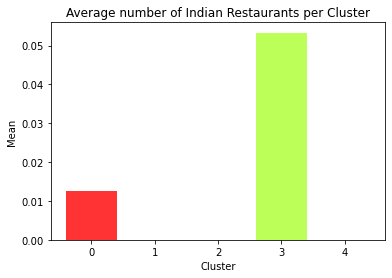

In [168]:
clusters_mean = [df_cluster0['Indian Restaurant'].mean(),df_cluster1['Indian Restaurant'].mean(),df_cluster2['Indian Restaurant'].mean(),df_cluster3['Indian Restaurant'].mean(),
                 df_cluster4['Indian Restaurant'].mean()]
objects = (0,1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine','green' 'yellow'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Indian Restaurants per Cluster')

plt.show()

## Discussion and conclusion

Most of the Indian restaurants are in cluster 3 represented by the green bar.The neighborhoods located in the cluster 3 that have the highest number of Indian restaurants are Sunset and Marpole. Clusters 1,2 and 4 have no Indian restaurants but the number of neighbourhoods is not more than two in each of these clusters.The cluster 0 has the most number of neighbourhoods but comparatively the  presence of Indian restaurants is not much.Having 14 neighbourhoods in the cluster will provide ample footfall for the restaurant to do business.So it is recommened that the investors can open Indian restaurant in cluster 0.
